## Import Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


import random
random.seed(42)

In [2]:
# Define my stocks
stocks = ['aapl', "msft", "csco", 'intc', 'goog', 'amzn', "ibm", 'adbe', 'akam', 'fcbk', 'ea', 'ebay']

In [3]:
aapl=pd.read_csv('../csv/aapl_8.csv', index_col='ticker')
goog=pd.read_csv('../csv/goog_8.csv', index_col='ticker')
msft=pd.read_csv('../csv/msft_8.csv', index_col='ticker')
adbe=pd.read_csv('../csv/adbe_8.csv', index_col='ticker')
akam=pd.read_csv('../csv/akam_8.csv', index_col='ticker')
fcbk=pd.read_csv('../csv/fcbk_8.csv', index_col='ticker')
amzn=pd.read_csv('../csv/amzn_8.csv', index_col='ticker')
ibm=pd.read_csv('../csv/ibm_8.csv', index_col='ticker')
intc=pd.read_csv('../csv/intc_8.csv', index_col='ticker')
csco=pd.read_csv('../csv/csco_8.csv', index_col='ticker')
ea=pd.read_csv('../csv/ea_8.csv', index_col='ticker')
ebay=pd.read_csv('../csv/ebay_8.csv', index_col='ticker')

In [4]:
comps = aapl
comps = aapl.append(goog, ignore_index=False, sort=None)
comps = comps.append(msft, ignore_index=False, sort=None)
comps = comps.append(adbe, ignore_index=False, sort=None)
comps = comps.append(akam, ignore_index=False, sort=None)
comps = comps.append(fcbk, ignore_index=False, sort=None)
comps = comps.append(amzn, ignore_index=False, sort=None)
comps = comps.append(ibm, ignore_index=False, sort=None)
comps = comps.append(intc, ignore_index=False, sort=None)
comps = comps.append(csco, ignore_index=False, sort=None)
comps = comps.append(ea, ignore_index=False, sort=None)
comps = comps.append(ebay, ignore_index=False, sort=None)

In [5]:
comps.head(2)

,Unnamed: 0,date,neg_text,uncert_text,pos_text,delta_0_p,delta_1_p,delta_1_0,delta_3_np,delta_7_np,delta_3_n0,delta_7_n0,period,an_buy,an_hold,an_sell,an_rating,an_d_p,an_d_0
ticker,,,,,,,,,,,,,,,,,,,
aapl,0,2010-10-18,break closure cut decline disaster disasters d...,almost approximate approximately assume assume...,able benefit best favorable innovation innovat...,1,0,0,0,0,0,0,30.0,44.0,2.0,0.0,4.848,0,0
aapl,1,2010-11-17,absence acquit against allege alleged breach b...,appear appearing appears depend dependent diff...,able beneficial beneficially desired effective...,0,1,1,1,1,1,1,62.0,44.0,4.0,0.0,4.771,0,0


In [6]:
comps.columns

Index(['Unnamed: 0', 'date', 'neg_text', 'uncert_text', 'pos_text',
       'delta_0_p', 'delta_1_p', 'delta_1_0', 'delta_3_np', 'delta_7_np',
       'delta_3_n0', 'delta_7_n0', 'period', 'an_buy', 'an_hold', 'an_sell',
       'an_rating', 'an_d_p', 'an_d_0'],
      dtype='object')

In [7]:
comps = comps[['delta_0_p',
       'delta_1_p', 'delta_1_0', 'delta_3_np', 'delta_7_np', 'delta_3_n0',
       'delta_7_n0', 'period', 'an_buy', 'an_hold', 'an_sell', 'an_rating',
       'an_d_p', 'an_d_0']]

In [8]:
# comps.set_index('ticker').head()

In [9]:
# X = comps.drop('ticker', axis = 1)
# ss = StandardScaler()
# ss.fit(X)

In [10]:
# X.head()

In [11]:
# # scaling another way
# # Calculate the mean for each feature
# mean = np.mean(df1, axis=0)

# # Calculate the standard deviation for each feature
# stddev = np.std(df1, axis=0)
# Substract the mean
# df1 = df1 - mean

# # Divide by the standard deviation
# df1 = df1 / stddev

In [12]:
# specify how many clusters the algorithm should generate.
n_clusters = 4

In [13]:
kmeans = KMeans(n_clusters)
kmeans.fit(comps)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
for label in np.unique(kmeans.labels_):
    indices = np.where(kmeans.labels_ == label)
    print("Cluster {}".format(label))
    print(np.unique(list(comps.index[indices])))
    print("")

Cluster 0
['aapl' 'adbe' 'akam' 'amzn' 'csco' 'ea' 'ebay' 'fcbk' 'goog' 'ibm' 'intc'
 'msft']

Cluster 1
['aapl' 'adbe' 'akam' 'amzn' 'csco' 'ea' 'ebay' 'fcbk' 'goog' 'ibm' 'intc'
 'msft']

Cluster 2
['aapl' 'amzn' 'csco' 'ebay' 'fcbk' 'msft']

Cluster 3
['aapl' 'adbe' 'akam' 'amzn' 'csco' 'ea' 'ebay' 'fcbk' 'goog' 'ibm' 'intc'
 'msft']



In [20]:
for stock in stocks:
    list_index = np.where(comps.index == stock)
    list_index = np.unique(list_index)
#     print("Your stock %s is in cluster %i." % (stock, kmeans.labels_[list_index]))
    print("Your stock {} is in cluster {}.".format(stock, np.unique(kmeans.labels_[list_index])))

Your stock aapl is in cluster [0 1 2 3].
Your stock msft is in cluster [0 1 2 3].
Your stock csco is in cluster [0 1 2 3].
Your stock intc is in cluster [0 1 3].
Your stock goog is in cluster [0 1 3].
Your stock amzn is in cluster [0 1 2 3].
Your stock ibm is in cluster [0 1 3].
Your stock adbe is in cluster [0 1 3].
Your stock akam is in cluster [0 1 3].
Your stock fcbk is in cluster [0 1 2 3].
Your stock ea is in cluster [0 1 3].
Your stock ebay is in cluster [0 1 2 3].


In [21]:
pca = PCA(n_components=2).fit(comps)
reduced_data = pca.transform(comps)

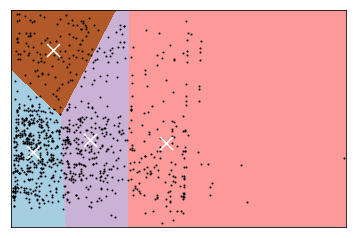

In [22]:
kmeans = KMeans(n_clusters)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()